# Stat 159 Group 20 Project

This is the Final Project of Group 20 for STAT 159 Spring 2023. The project explores factors that impact the housing price, such as demographic, socioeconomic, and environmental factors. The data is obtained from a [Kaggle tutorial competition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). The study starts with a introduction with a brief overview of the project's objectives and the data sources used in the analysis. Then, we did data importation and data cleaning. We created a 70/30 training/test dataset. For exploratory data analysis (EDA), we conducted descriptive statistics and visualizations, such as bar charts, histograms, and scatter plots. With the plots from EDA, we did feature selection to select the most relevant features for modeling using correlation analysis, feature importance techniques, and domain knowledge. We also conduct a simple ordinary least squares (OLS) regression to predict the outcome of interest using a subset of features. Then, we compared model performance using evaluation metrics such as R-squared, mean squared error, and mean absolute error. We provided the necessary packages and tests for this project, as well as the datasets and plots.

## Import Libraries and Load Data

In [1]:
# import Python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# import local library
from tools import utils

ModuleNotFoundError: No module named 'seaborn'

In [2]:
#l load train and test data

data = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

## Basic Dataset Exploration

First we take a simple look at the Pandas dataframe and its features.

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

Now that we have an idea of what the data looks like, we will clean the dataset for analysis.

In [6]:
# Seeing how many null values are in each column
data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

Removing Columns that have a lot of NaN values (since we will not be able to make good predictions with alot of missing data) and Id since it does not affect price.

In [7]:
# drop columns with >60% NaNs
data_cleaned = data[[column for column in data if data[column].count() / len(data) >= 0.6]]
data_cleaned.drop(['Id'], axis=1, inplace=True)
data_cleaned.head()

/tmp/ipykernel_18467/2395362859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(['Id'], axis=1, inplace=True)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [8]:
# print dropped features
for column in data.columns:
    if column not in data_cleaned.columns:
        print(column, ", ")

Id , 
Alley , 
FireplaceQu , 
PoolQC , 
Fence , 
MiscFeature , 


## Exploratory Data Analysis 
### Distribution of Sale Price and Sale Price Statistics

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_18467/3582955408.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Data_SalePrice = sns.distplot(data_cleaned['SalePrice'])


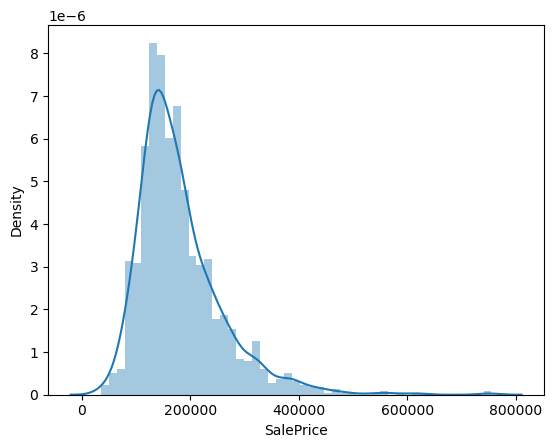

In [9]:
# sale price statistics
print(data_cleaned['SalePrice'].describe())
Data_SalePrice = sns.distplot(data_cleaned['SalePrice'])
fig = Data_SalePrice.get_figure()
fig.savefig('figures/Data_SalePrice.jpg')

### Distribution of Other Features

In [10]:
# Selecting only numerical data types for graphing and correlation
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_cleaned_numerical = data_cleaned.select_dtypes(include=numerics)

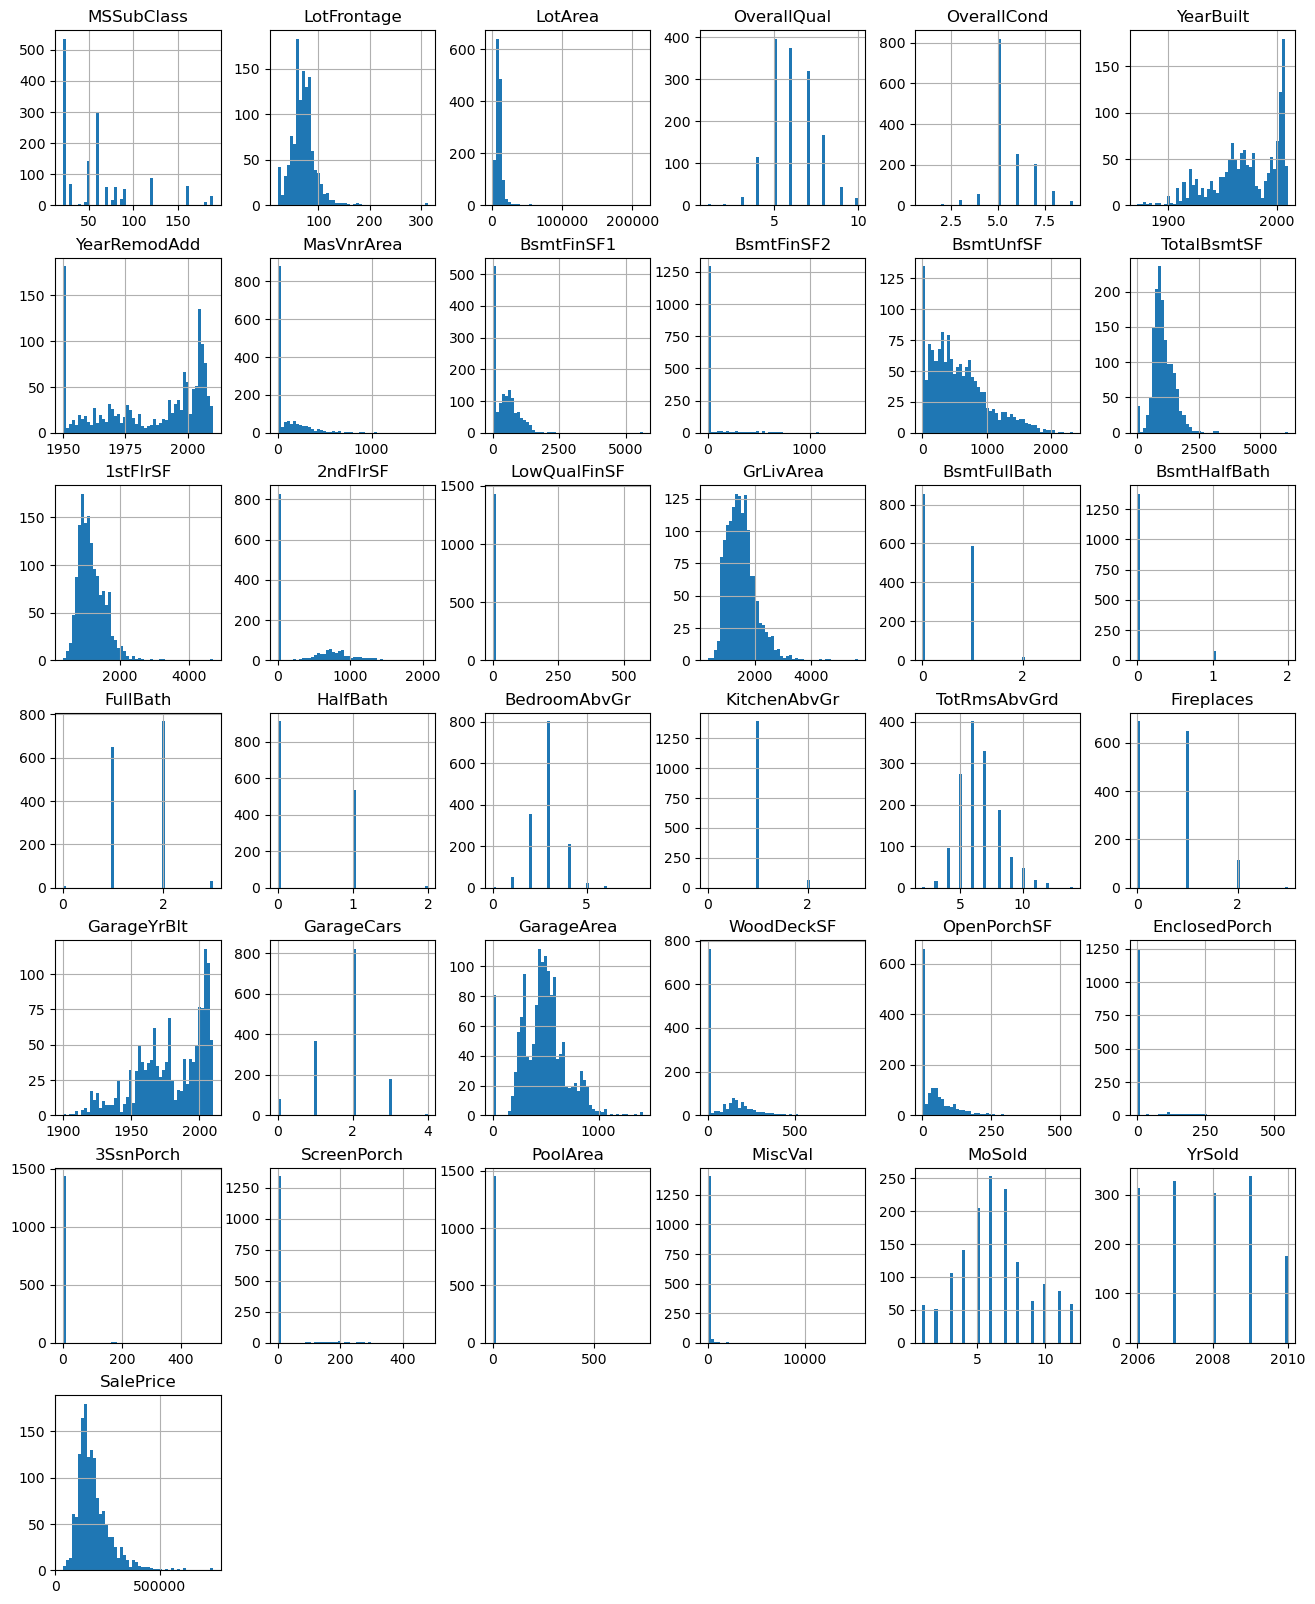

In [11]:
feature_histograms = data_cleaned_numerical.hist(figsize=(16, 20), bins=50)
plt.savefig('figures/feature_histograms.jpg')

### Feature Correlation Heatmap

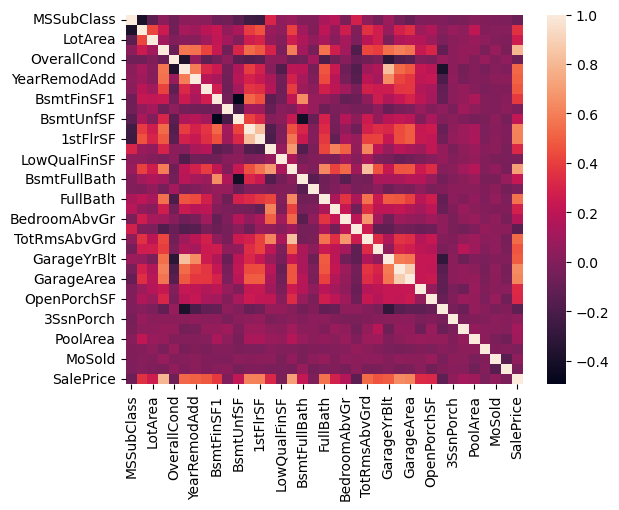

In [12]:
heatmap = sns.heatmap(data_cleaned_numerical.corr())
correlations = data_cleaned_numerical.corr()['SalePrice']
correlations[abs(correlations) > 0.6].sort_values(ascending=False)
fig = heatmap.get_figure()
fig.savefig('figures/heatmap.jpg')

Not including SalePrice, there are 6 strongly correlated features with SalePrice.

### 2D Projections of Data

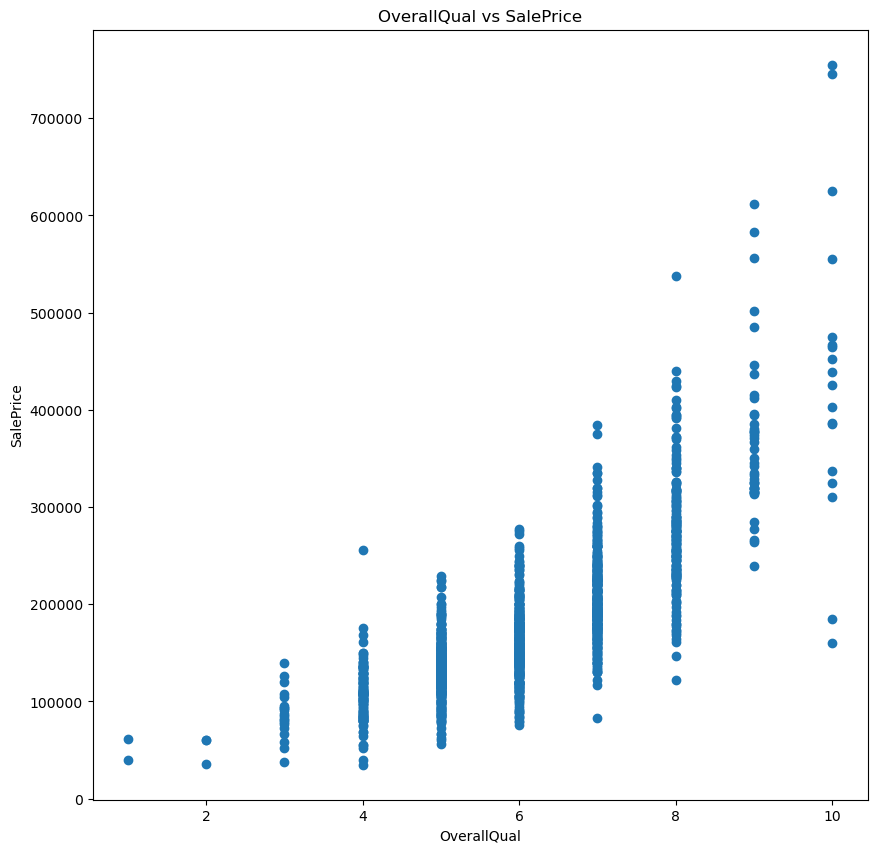

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(x='OverallQual',y='SalePrice',data=data)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual vs SalePrice')
plt.savefig('figures/OverallQual_v_SalePrice.jpg')

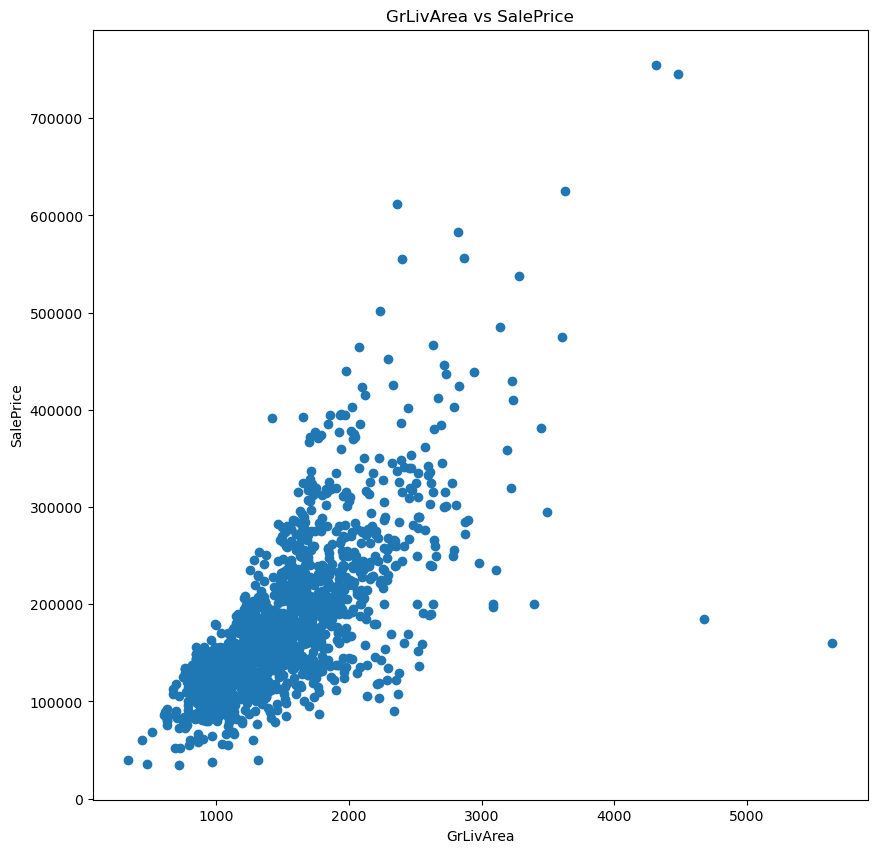

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(x='GrLivArea',y='SalePrice',data=data)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs SalePrice')
plt.savefig('figures/GrLivArea_v_SalePrice.jpg')

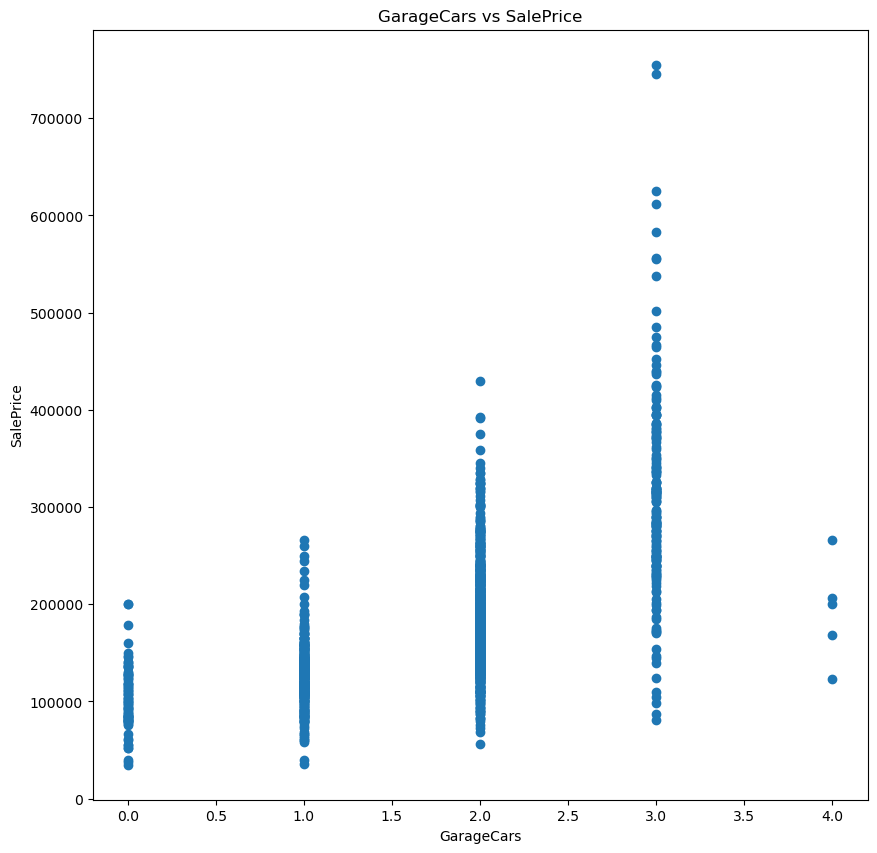

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(x='GarageCars',y='SalePrice',data=data)
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.title('GarageCars vs SalePrice')
plt.savefig('figures/GarageCars_v_SalePrice.jpg')

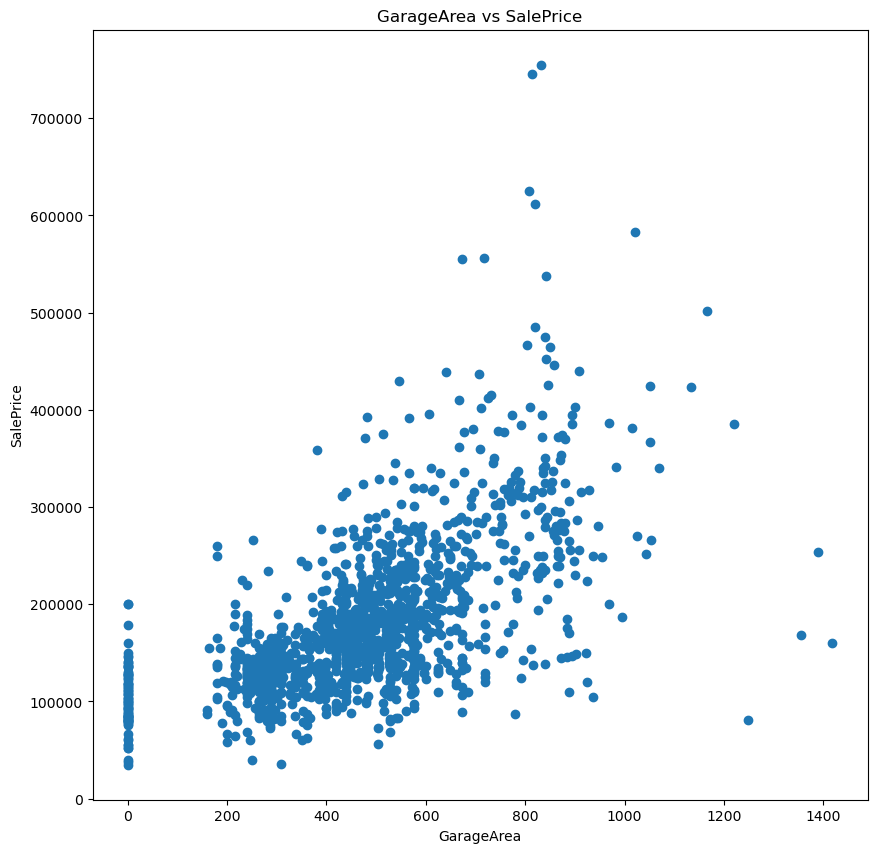

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(x='GarageArea',y='SalePrice',data=data)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('GarageArea vs SalePrice')
plt.savefig('figures/GarageArea_v_SalePrice.jpg')

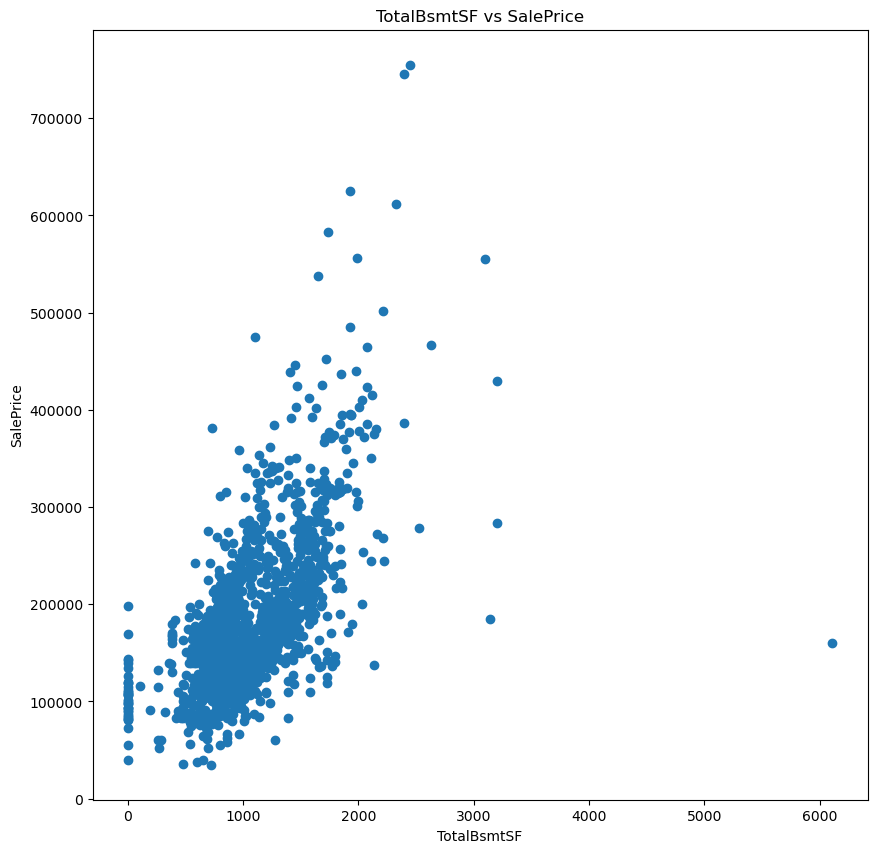

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(x='TotalBsmtSF',y='SalePrice',data=data)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('TotalBsmtSF vs SalePrice')
plt.savefig('figures/TotalBsmtSF_v_SalePrice.jpg')

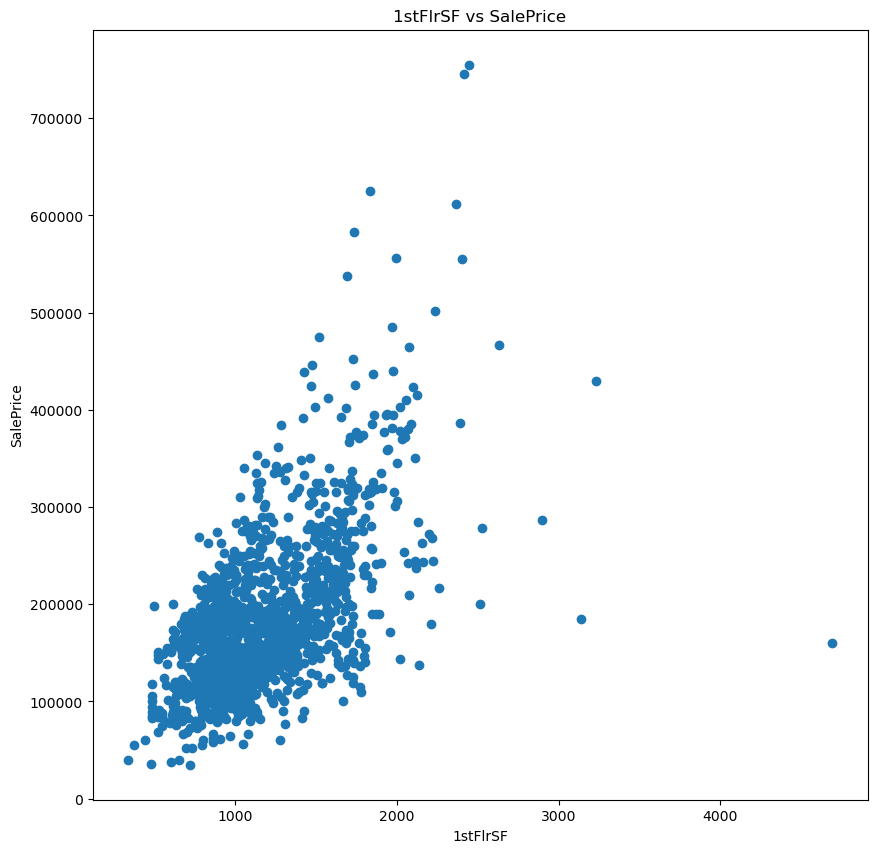

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(x='1stFlrSF',y='SalePrice',data=data)
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title('1stFlrSF vs SalePrice')
plt.savefig('figures/1stFlrSF_v_SalePrice.jpg')

## Ordinary Least Squares (OLS) Regression

We create a simple OLS regression model to predict the sale price of a given home.

In [19]:
# train test split

training_data, testing_data = train_test_split(data_cleaned_numerical, test_size=1/3, random_state=0)

In [20]:
ols = smf.ols(formula= 'SalePrice ~ OverallQual + GrLivArea + GarageCars + \
            GarageArea + TotalBsmtSF + Q("1stFlrSF")', data=training_data).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     597.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          6.11e-321
Time:                        08:56:40   Log-Likelihood:                -11599.
No. Observations:                 973   AIC:                         2.321e+04
Df Residuals:                     966   BIC:                         2.325e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.082e+05   5727.302    -18.886

In [21]:
# split features from objective

y_train = training_data['SalePrice']
X_train = training_data.drop(['SalePrice'], axis=1)
y_test = testing_data['SalePrice']
X_test = testing_data.drop(['SalePrice'], axis=1)

In [22]:
# calculate error statistics

ols_osr2 = utils.OSR2(ols, X_test, y_test, y_train)
ols_mae = utils.MAE(ols,  X_test, y_test, y_train)
print('OLS OSR2: ' + str(ols_osr2))
print('OLS MAE: ' + str(ols_mae))

OLS OSR2: 0.6944466034901211
OLS MAE: 25351.73544647477


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

/tmp/ipykernel_18467/3527105323.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Predicted_SalePrice = sns.distplot(predicting_price)


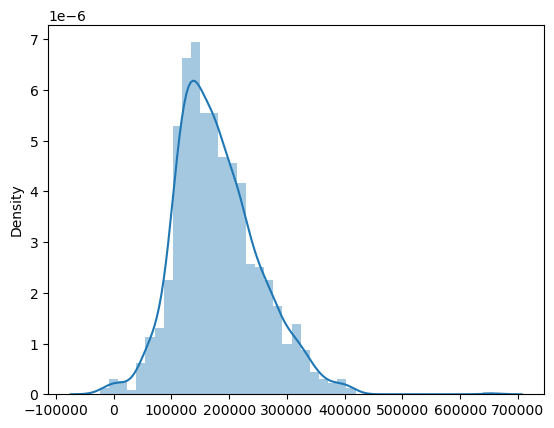

In [24]:
# plot results
predicting_price = ols.predict(test)
predicting_price.describe()
Predicted_SalePrice = sns.distplot(predicting_price)
fig = Predicted_SalePrice.get_figure()
fig.savefig('figures/Predicted_SalePrice.jpg')